In [1]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn import tree
import graphviz
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Data Pre-Processing

In [2]:
all_times = pd.read_csv("localonly/Spotify-2000.csv")
sixties = pd.read_csv("localonly/1960.csv")
seventies = pd.read_csv("localonly/1970.csv")
eighties = pd.read_csv("localonly/1980.csv")
nineties = pd.read_csv("localonly/1990.csv")
zeros = pd.read_csv("localonly/2000.csv")
tens = pd.read_csv("localonly/2010.csv")

In [3]:
all_times.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
sixties.head(5)

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
1,2,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
2,3,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
3,4,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78
4,5,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78


In [5]:
len(sixties)+len(seventies)+len(eighties)+len(nineties)+len(zeros)+len(tens)

594

In [6]:
combined = sixties.append(seventies, ignore_index=True).append(eighties, ignore_index=True)\
.append(nineties, ignore_index=True).append(zeros, ignore_index=True).append(tens, ignore_index=True)
len(combined)

594

In [7]:
combined.head(5)

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
1,2,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
2,3,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
3,4,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78
4,5,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78


#### For reference: 
In the data source it is stated that:

**top genre:** genre of the song\
**year:** year of the song (due to re-releases, the year might not correspond to the release year of the original song)\
**bpm(beats per minute):** beats per minute\
**nrgy(energy):** energy of a song, the higher the value the more energetic the song is\
**dnce(danceability):** the higher the value, the easier it is to dance to this song.\
**dB(loudness):** the higher the value, the louder the song.\
**live(liveness):** the higher the value, the more likely the song is a live recording.\
**val(valence):** the higher the value, the more positive mood for the song.\
**dur(duration):** the duration of the song.\
**acous(acousticness):** the higher the value the more acoustic the song is.\
**spch(speechiness):** the higher the value the more spoken word the song contains.\
**pop(popularity):** the higher the value the more popular the song is.

**Having the same format in both datasets:**

The 1960-2010s datasets are coming from the same source. The format of the dataset, and the column names are the same. However, to append the combined dataset of all five decades to the 2000s mega dataset, I will need to change the column names for better efficiency. Since both datasets are coming from Spotify, I will first only need to convert the column names.

In [8]:
combined = combined.rename(columns={"title":"Title",
                         "artist": "Artist",
                         "top genre": "Top Genre",
                         "year": "Year",
                         "bpm": "Beats Per Minute (BPM)",
                         "nrgy": "Energy",
                         "dnce": "Danceability",
                         "dB": "Loudness (dB)",
                         "live": "Liveness",
                         "val": "Valence",
                         "dur": "Length (Duration)",
                         "acous": "Acousticness",
                         "spch": "Speechiness",
                         "pop": "Popularity"})
combined = combined.drop(["Number"], axis=1).reset_index(drop=True)
combined.head(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
1,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
2,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
3,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78
4,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78


In [9]:
all_times = all_times.drop(["Index"], axis=1).reset_index(drop=True)
all_times.head(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


**Combining the two datasets:**

Now, I will combine the both datasets and try to clean them. I will look for duplicat values that are caused by the merge, NaN values, and any unusualities in the dataset.

In [10]:
len(all_times)

1994

In [11]:
len(combined)

594

In [12]:
df = combined.append(all_times, ignore_index=True)
len(df)

2588

In [13]:
df.head(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
1,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
2,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
3,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78
4,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78


**Checking Missing Values:**

In [14]:
null_sum = df.isnull().sum()
null_sum

Title                     0
Artist                    0
Top Genre                 4
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

There are null values only in the Genre column. I will drop the null values as our aim is to predict the genre, and these rows do not have any values. I will keep them as a separate dataframe to later use our best model to predict what genre they might belong to.

In [15]:
null_genre = df[df['Top Genre'].isna()].reset_index(drop=True)
null_genre

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,We Are The World,U.S.A. For Africa,NaN,1985,73,45,53,-15,7,29,427,19,4,69
1,I Promised Myself,Nick Kamen,NaN,1990,128,80,58,-12,3,69,241,0,3,61
2,You,Ten Sharp,NaN,1991,174,90,41,-8,19,67,273,43,3,61
3,Ain't That Just the Way,Lutricia McNeal,NaN,1996,174,65,74,-9,19,77,215,6,22,55


In [16]:
df.dropna(axis = 0, inplace = True)

In [17]:
null_sum = df.isnull().sum()
null_sum

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [18]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,1993.472136,120.162926,60.806502,55.125000,-8.763545,18.834752,51.200464,27.902477,5.318885,61.037539
std,16.418406,27.214242,21.753709,15.602106,3.637702,16.283950,24.961094,28.224224,4.986441,14.003945
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.000000
25%,1979.000000,100.000000,44.000000,44.000000,-11.000000,9.000000,30.000000,4.000000,3.000000,52.000000
50%,1995.000000,119.000000,63.000000,55.000000,-8.000000,13.000000,50.000000,18.000000,4.000000,63.000000
75%,2008.000000,135.000000,79.000000,66.000000,-6.000000,23.000000,72.000000,48.000000,5.000000,72.000000
max,2019.000000,206.000000,100.000000,96.000000,-1.000000,99.000000,99.000000,99.000000,55.000000,100.000000


**Checking duplicate values:**

Now, we will check if there are any duplicates after the merge.

In [19]:
df['Title'].duplicated().any() 

True

So, there are duplicate songs. Now, we will find them and keep only one copy of each song.

In [20]:
duplicates = df[df["Title"].duplicated()]

In [21]:
df.drop_duplicates(subset = ['Title'], keep = 'first', inplace = True, ignore_index = True)

In [22]:
df['Title'].duplicated().any()  #to check if we have any duplicate values left

False

In [23]:
len(df)

2403

**Converting the non-numeric columns into categorical columns:**

In [24]:
df.dtypes 

Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [25]:
categorical = ["Top Genre"]
textual = ["Title", "Artist"]
numerical = ["Length (Duration)"]

In [26]:
df[categorical] = df[categorical].astype('category')

In [27]:
df[textual] = df[textual].astype('string')

In [28]:
#df[numerical] = df[numerical].astype('int64')

'''
we get an error at a specific row when we try to convert all the rows into numerical type
we will investigate
'''

'\nwe get an error at a specific row when we try to convert all the rows into numerical type\nwe will investigate\n'

In [29]:
df[df["Length (Duration)"]=="1,412"]

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1366,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,"1,412",37,4,58


In [30]:
df.iat[1366, 10]

'1,412'

In [31]:
df.iat[1366, 10] = 1412

In [32]:
df.iat[1366, 10]

1412

In [33]:
#df[numerical] = df[numerical].astype('int64') 
#trying again, we found other values

In [34]:
tg = df["Length (Duration)"]
for i in range(len(tg)):
        if(type(tg[i]) == str):
            tg[i] = float(tg[i].replace(',',''))

/var/folders/wj/wzcmzk2n2232h1jj_2tfgl700000gn/T/ipykernel_5876/1071337376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg[i] = float(tg[i].replace(',',''))


In [35]:
df[numerical] = df[numerical].astype('int64')

In [36]:
x = pd.to_numeric(tg, errors='coerce').notnull()
x[x == False]

Series([], Name: Length (Duration), dtype: bool)

In [37]:
df.dtypes 

Title                       string
Artist                      string
Top Genre                 category
Year                         int64
Beats Per Minute (BPM)       int64
Energy                       int64
Danceability                 int64
Loudness (dB)                int64
Liveness                     int64
Valence                      int64
Length (Duration)            int64
Acousticness                 int64
Speechiness                  int64
Popularity                   int64
dtype: object

**Formatting the genre column:**

We have a dataset that is cleaned from duplicates and null values, and is formatted with the correct data types. Now, we can look closer into the genre column to see which genres this dataset embodies.

In [38]:
cnts = df['Top Genre'].value_counts()
cnts

album rock             453
dance pop              185
adult standards        164
alternative rock        86
dutch pop               85
                      ... 
classic soundtrack       1
classic italian pop      1
classic girl group       1
classic danish pop       1
yacht rock               1
Name: Top Genre, Length: 193, dtype: int64

In [39]:
cnts[cnts == 1]

happy hardcore         1
levenslied             1
latin jazz             1
hard rock              1
hi-nrg                 1
                      ..
classic soundtrack     1
classic italian pop    1
classic girl group     1
classic danish pop     1
yacht rock             1
Name: Top Genre, Length: 80, dtype: int64

In [40]:
df['Top Genre'].nunique()

193

In [41]:
genres = df['Top Genre'].unique()

In [42]:
genres = list(genres)

There are a total of 193 different genres. This is too many categories. When looked closely, we can see that some of the genres have different subcategories, such as for pop, that occur only one time --> afropop, art pop, bow pop...
Let's find the occurence of most common genres, and how many data are associated with them.

In [43]:
c = Counter(df['Top Genre'])

In [44]:
c.most_common(25)

[('album rock', 453),
 ('dance pop', 185),
 ('adult standards', 164),
 ('alternative rock', 86),
 ('dutch pop', 85),
 ('dutch indie', 74),
 ('alternative metal', 70),
 ('glam rock', 57),
 ('dance rock', 57),
 ('pop', 54),
 ('classic rock', 53),
 ('dutch cabaret', 51),
 ('modern rock', 48),
 ('art rock', 46),
 ('british invasion', 39),
 ('permanent wave', 38),
 ('europop', 35),
 ('british soul', 34),
 ('irish rock', 33),
 ('disco', 26),
 ('classic uk pop', 24),
 ('neo mellow', 21),
 ('big room', 20),
 ('blues rock', 18),
 ('dutch rock', 18)]

From what we can see, "pop" and "rock" were the most repeating main classes.

In [45]:
df["Top Genre"].str.count("pop").sum()

551

In [46]:
df["Top Genre"].str.count("rock").sum()

926

In [47]:
genres

['british invasion',
 'adult standards',
 'album rock',
 'brill building pop',
 'baroque pop',
 'blues rock',
 'classic soul',
 'art rock',
 'rock-and-roll',
 'chanson',
 'australian rock',
 'classic rock',
 'canadian folk',
 'alternative country',
 'acoustic blues',
 'art pop',
 'classic girl group',
 'bubblegum pop',
 'blues',
 'american folk revival',
 'bebop',
 'beach music',
 'appalachian folk',
 'cowboy western',
 'drone folk',
 'british folk',
 'boogaloo',
 'avant-garde jazz',
 'afropop',
 'british blues',
 'afrobeat',
 'australian talent show',
 'glam rock',
 'europop',
 'hollywood',
 'soft rock',
 'pop',
 'disco',
 'country',
 'dance rock',
 'classic country pop',
 'chicago soul',
 'brit funk',
 'classic uk pop',
 'country rock',
 'dance pop',
 'native american',
 'glam metal',
 'new wave pop',
 'mellow gold',
 'hi-nrg',
 'glam punk',
 'bow pop',
 'eurodance',
 'alternative rock',
 'classic danish pop',
 'jazz fusion',
 'bronx hip hop',
 'british soul',
 'atl hip hop',
 'boy b

We will try to categorize everything into these three main classes and see which one weighs them all. Because when we check specific genres, e.g. "adult standards", we can see that they actually belong to one main class --> "A typical adult standards playlist includes traditional pop music by artists such as Frank Sinatra and Tony Bennett [link](https://en.wikipedia.org/wiki/Adult_standards#:~:text=A%20typical%20adult%20standards%20playlist,also%20features%20big%20band%20music%2C) ." By checking each genre, I came up with the below list that categorizes everything as pop, rock, or others. The main aim is to get the music genres that have minimal difference into one big category.

In [48]:
pop_like = ['british invasion','adult standards','brill building pop','baroque pop',
            'art pop','classic girl group','bubblegum pop','bebop','beach music',
            'boogaloo','afropop','afrobeat','australian talent show','europop',
            'hollywood','pop','disco','classic country pop', 'brit funk','classic uk pop',
            'dance pop', 'new wave pop','mellow gold', 'hi-nrg','glam punk','bow pop',
            'eurodance','classic danish pop','jazz fusion','bronx hip hop','atl hip hop',
            'boy band','canadian pop','east coast hip hop','g funk','bubblegum dance',
            'britpop','hip hop','neo mellow','diva house','italian pop','german dance',
            'bubble trance','disco house','big beat','permanent wave','barbadian pop',
            'detroit hip hop','latin','hip pop','belgian pop','belgian dance','electropop',
            'canadian hip hop','conscious hip hop','irish pop','indie poptimism','alternative hip hop',
            'dutch pop','dutch americana','alternative dance','german pop','australian pop',
            'downtempo','dutch hip hop','acoustic pop','candy pop','operatic pop','alternative pop',
            'uk pop','happy hardcore','classic schlager','chamber pop','british singer-songwriter',
            'indie pop','nederpop','folk-pop','metropopolis','stomp and holler','australian dance',
            'danish pop','la pop','ccm','austropop','australian americana', 'classic italian pop',
            'pop punk']
rock_like = ['album rock','art rock','rock-and-roll','australian rock','classic rock', 
             'glam rock','soft rock','dance rock','country rock','glam metal',
             'alternative rock','german alternative rock','alternative metal','celtic rock',
             'modern rock','alternative pop rock','garage rock','modern folk rock',
             'irish rock','danish pop rock','dutch rock','belgian rock','finnish metal',
             'dutch metal','gabba','hard rock','australian alternative rock','yacht rock',
             'classic canadian rock','classical rock','canadian rock','german pop rock',
             'british alternative rock']

others = ['classic soul','chanson','canadian folk','alternative country', 'acoustic blues', 
          'american folk revival','appalachian folk','cowboy western','drone folk',
          'british folk','avant-garde jazz','british blues','country','chicago soul',
          'native american','british soul','deep house','chicago rap','r&b','big room',
          'dirty south rap','country rap','dfw rap','emo rap','canadian contemporary r&b',
          'brostep','electro house','alternative r&b','complextro','edm','aussietronica',
          'dutch indie','dutch cabaret','carnaval limburg', 'arkansas country', 'latin alternative',
          'celtic','electro','reggae fusion','acid jazz','dutch prog','trance','scottish singer-songwriter',
          'contemporary country', 'australian indie folk','electronica','alaska indie','irish singer-songwriter',
          'australian psych','laboratorio','contemporary vocal jazz','classic soundtrack', 'icelandic indie',
          'compositional ambient','streektaal','indie anthem-folk','neo soul','reggae',
          'j-core','funk','folk','punk','basshall','celtic punk','christelijk','levenslied',
          'cyberpunk','gangster rap','latin jazz','motown', 'blues rock', 'uk garage', 'blues']

In [49]:
 def counter_word(df_col, genre_list):   
    sum = 0
    for i in genre_list:
        for j in df_col:
            if i == j:
                sum += 1
    print(sum)

In [50]:
counter_word(df["Top Genre"], others)

379


In [51]:
counter_word(df["Top Genre"], pop_like)

1021


In [52]:
counter_word(df["Top Genre"], rock_like)

1003


In [53]:
379 + 1021 + 1003

2403

In [54]:
len(df)

2403

**Deciding on the classes:**

It can be seen that:\
pop_like (1021) > rock_like (1003) > others (379)

So, when we combine the _rock_like_ group with the _others_ group, we get:


In [55]:
data = {
  "Pop_Like": [1021],
  "Others": [1382]
}

#load data into a DataFrame object:
table_df = pd.DataFrame(data, index = ["Count"])
table_df

,Pop_Like,Others
Count,1021,1382


In [56]:
table_perc = pd.DataFrame(data, index = ["Percentage"])
table_perc = (table_perc * 100 / 2403).round(1)
table_perc

,Pop_Like,Others
Percentage,42.5,57.5


Even though 42.5% and 57.5% are not equal, this is a fair distribution to conduct binary classification on.\

One possible set back is that there is probably minimal similarity between the genres that are combined in the "Others" category. However, as my main aim is not to have a multiclass classification and conduct binary classification on pop and non-pop songs, as long as the genres that are combined under the Pop_Like umbrella are similar, the classification results for the Pop_Like label will be satisfying. This problem can be discussed during the future steps / suggestion section.

**Assign numerical values to do classes:**

Now, we have to convert the categorical variables into binary classes using one-hot encoding.

In [57]:
Pop_Like = pop_like
Others = rock_like + others

In [58]:
Encoding = []
for i in df["Top Genre"]:
    if i in Pop_Like:
        Encoding.append(1)
    if i in Others:
        Encoding.append(0)

Counter(Encoding).keys()
Counter(Encoding).values()

dict_values([1021, 1382])

In [59]:
df['Label'] = Encoding

**Creating a table with the usuable features:**

While classifying, it is obvious that we cannot use artist names or song titles, as they may lead to leaking or cheating of the model during the training process. So, we will drop the features that won't help our genre classification. Since now we have our label column, we will also drop the Top Genre column.

In [60]:
df.head(2)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Label
0,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82,1
1,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79,1


In [61]:
data = df.drop(["Title", "Artist", "Top Genre"], axis=1).reset_index(drop=True)
data.head(2)

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Label
0,1969,129,54,56,-10,18,39,186,3,3,82,1
1,1969,165,38,53,-12,9,19,260,3,4,79,1


To have easy access to the column names, we will shorten the column names with more than one word.

In [62]:
data = data.rename(columns={"Beats Per Minute (BPM)":"BPM",
                         "Loudness (dB)": "Loudness",
                         "Length (Duration)": "Length"})
data.head(10)

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Label
0,1969,129,54,56,-10,18,39,186,3,3,82,1
1,1969,165,38,53,-12,9,19,260,3,4,79,1
2,1969,63,13,53,-16,24,58,204,61,3,78,1
3,1965,97,18,33,-12,9,32,126,88,3,78,1
4,1961,100,29,40,-14,11,34,182,94,3,78,1
5,1962,119,26,67,-14,6,37,147,45,5,76,1
6,2000,131,72,49,-6,31,87,146,39,5,74,1
7,1968,110,58,55,-13,4,46,298,19,3,73,0
8,2000,116,34,55,-9,10,47,155,75,3,72,1
9,1968,134,51,66,-7,28,85,178,31,3,72,1


Reordering the columns so we have the label column in the first index.

In [63]:
cols = data.columns.tolist()

In [64]:
cols = cols[-1:] + cols[:-1]

In [65]:
cols

['Label',
 'Year',
 'BPM',
 'Energy',
 'Danceability',
 'Loudness',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [66]:
data = data[cols]

In [67]:
data.head(5)

,Label,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,1969,129,54,56,-10,18,39,186,3,3,82
1,1,1969,165,38,53,-12,9,19,260,3,4,79
2,1,1969,63,13,53,-16,24,58,204,61,3,78
3,1,1965,97,18,33,-12,9,32,126,88,3,78
4,1,1961,100,29,40,-14,11,34,182,94,3,78


In [68]:
data.dtypes

Label           int64
Year            int64
BPM             int64
Energy          int64
Danceability    int64
Loudness        int64
Liveness        int64
Valence         int64
Length          int64
Acousticness    int64
Speechiness     int64
Popularity      int64
dtype: object

**The dataset is ready to use!**

# 2. Models

**Checking the correlations of the features:**

In [69]:
corrmat = data.corr()
print(corrmat)

                 Label      Year       BPM    Energy  Danceability  Loudness  \
Label         1.000000  0.184557 -0.017190 -0.041046      0.167492  0.073799   
Year          0.184557  1.000000  0.003613  0.162553      0.136842  0.373836   
BPM          -0.017190  0.003613  1.000000  0.145814     -0.135847  0.072000   
Energy       -0.041046  0.162553  0.145814  1.000000      0.175638  0.722701   
Danceability  0.167492  0.136842 -0.135847  0.175638      1.000000  0.107809   
Loudness      0.073799  0.373836  0.072000  0.722701      0.107809  1.000000   
Liveness     -0.015677  0.012413  0.006721  0.156949     -0.106361  0.085234   
Valence       0.027312 -0.141324  0.051742  0.412790      0.511939  0.151956   
Length       -0.139425 -0.074035  0.005671  0.005955     -0.150332 -0.074969   
Acousticness  0.079131 -0.165146 -0.124597 -0.649500     -0.172948 -0.453773   
Speechiness   0.078437  0.097661  0.067129  0.188278      0.161340  0.145817   
Popularity    0.092051 -0.051777 -0.0003

Correlations for the label value:

In [70]:
corrmat2 = corrmat["Label"].sort_values(ascending = False)
print(corrmat2)

Label           1.000000
Year            0.184557
Danceability    0.167492
Popularity      0.092051
Acousticness    0.079131
Speechiness     0.078437
Loudness        0.073799
Valence         0.027312
Liveness       -0.015677
BPM            -0.017190
Energy         -0.041046
Length         -0.139425
Name: Label, dtype: float64


Let's visualize this to have a better understanding:

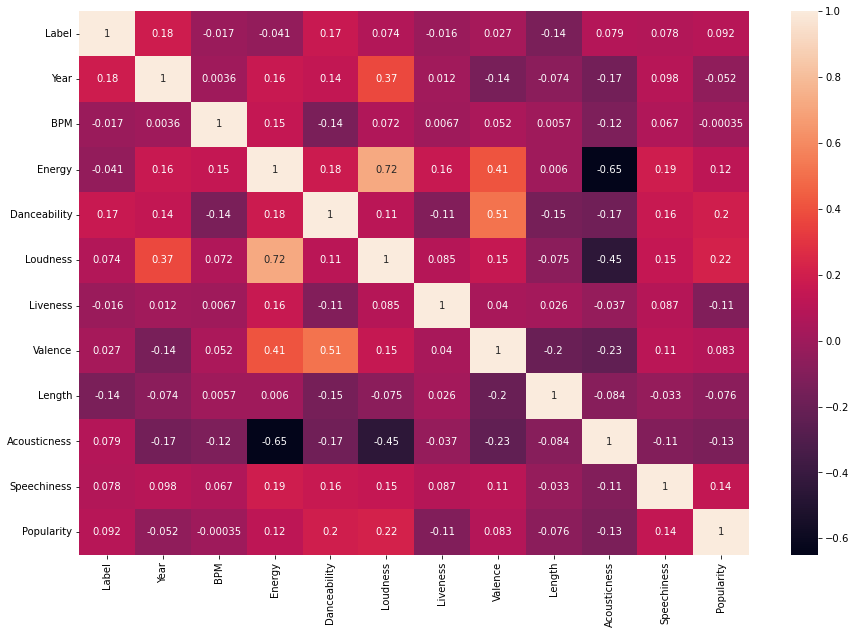

In [71]:
import seaborn as sns
corrmat3 = data.corr(method='pearson')

plt.figure(figsize=(15, 10))
sns.heatmap(corrmat3, annot=True)
plt.show()

We can see that there are highly correalted features. Even though the correlations are not that strong, because several independent variables are correlated, this might have indicated multicollinearity. However, in our decision tree and random forest models, we will see if this will create a problem.

**Splitting the data into test and training sets**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
training_set, testing_set = train_test_split(data, test_size = 0.25, random_state = 2023)

In [74]:
# training set
X_train = training_set.values[:,1:]
y_train = training_set.values[:,0]

In [75]:
# testing set
X_test = testing_set.values[:,1:]
y_test = testing_set.values[:,0]

In [76]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [77]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## A. Decision Tree

Basic decision tree, without any parameter fine-tuning:

In [78]:
DT_clf = DecisionTreeClassifier(random_state=40)

In [79]:
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

**Seeing the results:**

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

'''
to combine the print scores, I consulted to this Geeks for Geeks page
(https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/)
'''

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [81]:
print_score(DT_clf, X_train, y_train, X_test, y_test, train=True)
print_score(DT_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1029.0  773.0       1.0     1802.0        1802.0
_______________________________________________
Confusion Matrix: 
 [[1029    0]
 [   0  773]]

Test Result:
Accuracy Score: 58.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.648968    0.492366  0.580699    0.570667      0.584347
recall       0.623229    0.520161  0.580699    0.571695      0.580699
f1-score     0.635838    0.505882  0.580699    0.570860      0.582212
support    353.000000  248.000000  0.580699  601.000000    601.000000
______________________________________

**Visualizing the results:**

In [82]:
feature_n = cols[1:]
target_n = ["0", "1"]

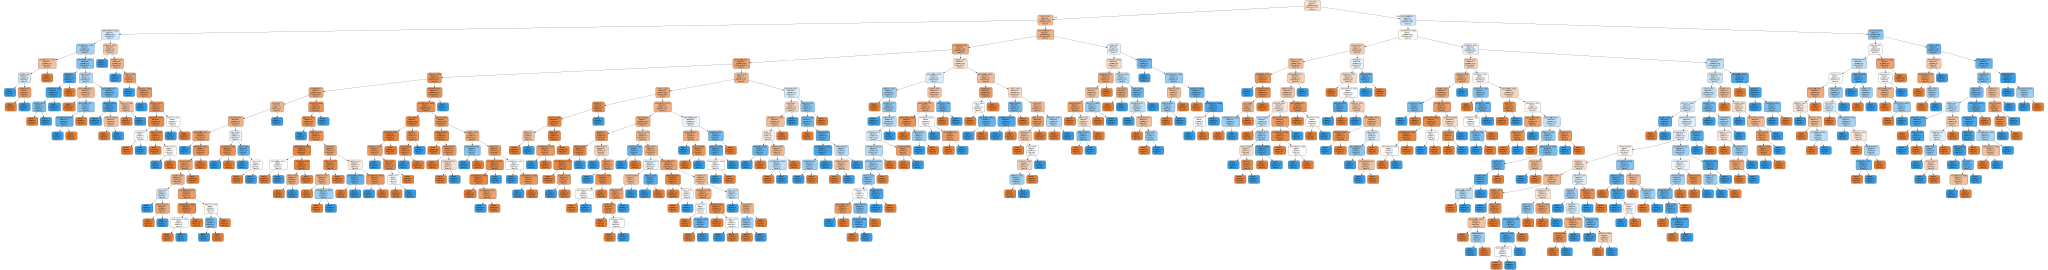

In [83]:
dot_data = tree.export_graphviz(DT_clf, out_file=None, 
                                feature_names= feature_n,  
                                class_names= target_n,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [84]:
graph.format = "png"
graph.render("DT_clf")

'DT_clf.png'

**Playing with the parameters in the model:**

**1.**

In [85]:
DT_clf1 = DecisionTreeClassifier(criterion = "entropy",
                                 max_depth=5,
                                 min_samples_split=10,
                                 min_samples_leaf=5,
                                 random_state=41)
DT_clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=41)

In [86]:
print_score(DT_clf1, X_train, y_train, X_test, y_test, train=True)
print_score(DT_clf1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 71.14%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.735867    0.674965  0.711432     0.705416      0.709742
recall        0.771623    0.631307  0.711432     0.701465      0.711432
f1-score      0.753321    0.652406  0.711432     0.702864      0.710032
support    1029.000000  773.000000  0.711432  1802.000000   1802.000000
_______________________________________________
Confusion Matrix: 
 [[794 235]
 [285 488]]

Test Result:
Accuracy Score: 62.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.677686    0.550420  0.627288    0.614053      0.625170
recall       0.696884    0.528226  0.627288    0.612555      0.627288
f1-score     0.687151    0.539095  0.627288    0.613123      0.626056
support    353.000000  248.000000  0.627288  601.0000

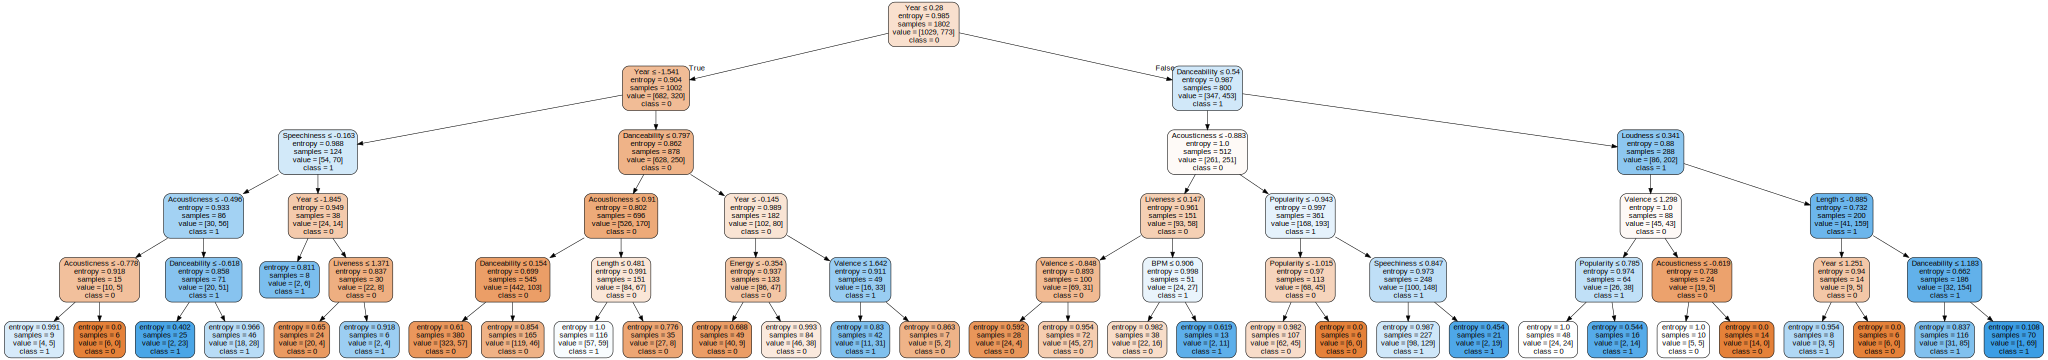

In [87]:
dot_data1 = tree.export_graphviz(DT_clf1, out_file=None, 
                                feature_names= feature_n,  
                                class_names= target_n,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph1 = graphviz.Source(dot_data1)  
graph1

In [88]:
graph1.format = "png"
graph1.render("DT_clf1")

'DT_clf1.png'

**2.**

In [89]:
DT_clf2 = DecisionTreeClassifier(criterion = "gini",
                                 max_depth=10,
                                 min_samples_split=10,
                                 min_samples_leaf=5,
                                 random_state=42)
DT_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [90]:
print_score(DT_clf2, X_train, y_train, X_test, y_test, train=True)
print_score(DT_clf2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.74%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.831181    0.821727  0.827414     0.826454      0.827125
recall        0.875607    0.763260  0.827414     0.819434      0.827414
f1-score      0.852816    0.791415  0.827414     0.822116      0.826477
support    1029.000000  773.000000  0.827414  1802.000000   1802.000000
_______________________________________________
Confusion Matrix: 
 [[901 128]
 [183 590]]

Test Result:
Accuracy Score: 60.23%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.664740    0.517647  0.602329    0.591193      0.604043
recall       0.651558    0.532258  0.602329    0.591908      0.602329
f1-score     0.658083    0.524851  0.602329    0.591467      0.603105
support    353.000000  248.000000  0.602329  601.0000

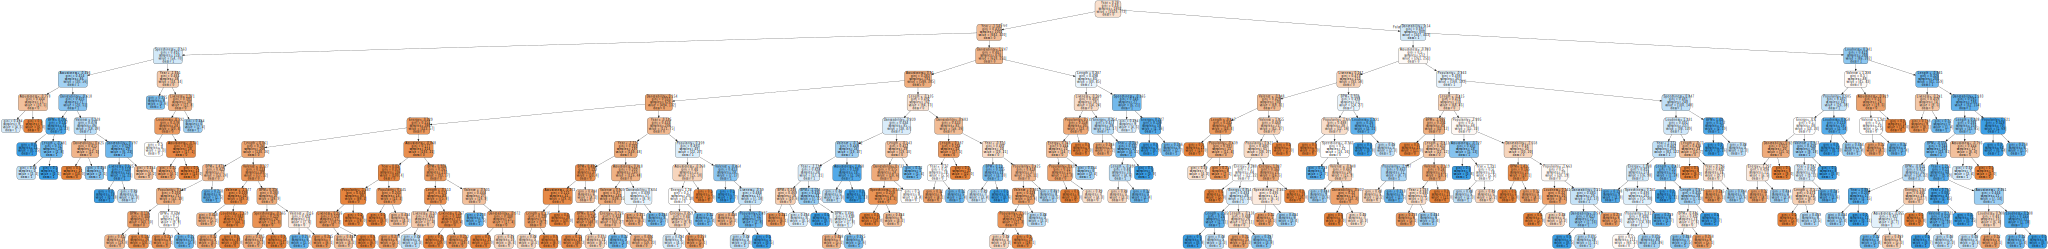

In [91]:
dot_data2 = tree.export_graphviz(DT_clf2, out_file=None, 
                                feature_names= feature_n,  
                                class_names= target_n,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph2 = graphviz.Source(dot_data2)  
graph2

In [92]:
graph2.format = "png"
graph2.render("DT_clf2")

'DT_clf2.png'

**3.**

In [93]:
DT_clf3 = DecisionTreeClassifier(criterion = "entropy",
                                 splitter = "random",
                                 max_depth=10,
                                 #min_samples_split=10,
                                 min_samples_leaf=3,
                                 random_state=43)
DT_clf3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       random_state=43, splitter='random')

In [94]:
print_score(DT_clf3, X_train, y_train, X_test, y_test, train=True)
print_score(DT_clf3, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 74.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.721538    0.818725  0.748613     0.770132      0.763228
recall        0.911565    0.531695  0.748613     0.721630      0.748613
f1-score      0.805496    0.644706  0.748613     0.725101      0.736522
support    1029.000000  773.000000  0.748613  1802.000000   1802.000000
_______________________________________________
Confusion Matrix: 
 [[938  91]
 [362 411]]

Test Result:
Accuracy Score: 59.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.630233    0.520468  0.599002    0.575350      0.584939
recall       0.767705    0.358871  0.599002    0.563288      0.599002
f1-score     0.692209    0.424821  0.599002    0.558515      0.581873
support    353.000000  248.000000  0.599002  601.0000

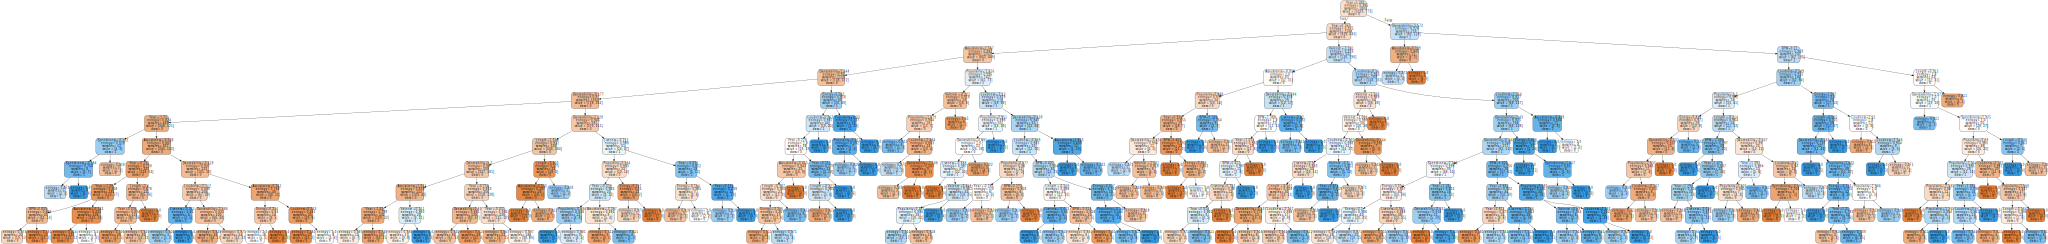

In [95]:
dot_data3 = tree.export_graphviz(DT_clf3 , out_file=None, 
                                feature_names= feature_n,  
                                class_names= target_n,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph3 = graphviz.Source(dot_data3)  
graph3

In [96]:
graph3.format = "png"
graph3.render("DT_clf3")

'DT_clf3.png'

**Comparing different decision trees:**

chosen model: DT_clf1\
Please see the accompanying slides and saved figure images for the explanations.

## B. Random Forest

Basic random forest model without fine-tuning the parameters:

In [97]:
rfc = RandomForestClassifier(n_estimators=200)

In [98]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [99]:
pred_rfc = rfc.predict(X_test)

**Seeing the results:**

In [100]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       353
           1       0.59      0.49      0.54       248

    accuracy                           0.65       601
   macro avg       0.64      0.63      0.63       601
weighted avg       0.64      0.65      0.64       601



In [101]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[270  83]
 [127 121]]


**Optimizing our results:**

In [102]:
from sklearn.model_selection import cross_val_score
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', rfc_eval.mean(), rfc_eval.std()))

Random Forest: 0.657084 (0.024480)


Random forest accuracy did not change much after cross validation.

**Playing with different parameters:**

**1.**

In [103]:
rfc1 = RandomForestClassifier(n_estimators=500, criterion= "entropy", max_depth= 10, min_samples_leaf= 5)
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=500)

In [104]:
pred_rfc1 = rfc1.predict(X_test)

In [105]:
print(classification_report(y_test, pred_rfc1))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       353
           1       0.59      0.46      0.52       248

    accuracy                           0.65       601
   macro avg       0.63      0.62      0.62       601
weighted avg       0.64      0.65      0.64       601



In [106]:
rfc_eval1 = cross_val_score(estimator = rfc1, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', rfc_eval1.mean(), rfc_eval1.std()))

Random Forest: 0.654306 (0.031707)


**2.**

In [107]:
rfc2 = RandomForestClassifier(n_estimators=300, criterion= "gini", max_depth= 10, min_samples_split=3,
                             min_samples_leaf= 1)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=300)

In [108]:
pred_rfc2 = rfc2.predict(X_test)

In [109]:
print(classification_report(y_test, pred_rfc2))

              precision    recall  f1-score   support

           0       0.67      0.76      0.72       353
           1       0.58      0.47      0.52       248

    accuracy                           0.64       601
   macro avg       0.63      0.62      0.62       601
weighted avg       0.64      0.64      0.64       601



In [110]:
rfc_eval2 = cross_val_score(estimator = rfc2, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', rfc_eval2.mean(), rfc_eval2.std()))

Random Forest: 0.660408 (0.026521)


**3.**

In [111]:
rfc3 = RandomForestClassifier(n_estimators=200, criterion= "entropy", max_depth= 15, min_samples_split=6,
                              min_samples_leaf= 5, bootstrap= False)
rfc3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       min_samples_leaf=5, min_samples_split=6,
                       n_estimators=200)

In [112]:
pred_rfc3 = rfc3.predict(X_test)

In [113]:
print(classification_report(y_test, pred_rfc3))

              precision    recall  f1-score   support

           0       0.68      0.76      0.71       353
           1       0.58      0.48      0.53       248

    accuracy                           0.64       601
   macro avg       0.63      0.62      0.62       601
weighted avg       0.64      0.64      0.64       601



In [114]:
rfc_eval3 = cross_val_score(estimator = rfc3, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', rfc_eval3.mean(), rfc_eval3.std()))

Random Forest: 0.651532 (0.024545)


In [117]:
confusion_matrix(y_test, pred_rfc3)

array([[267,  86],
       [128, 120]])

**Comparing different random forest models:**

chosen model: rfc3\
Please see the accompanying slides and saved figure images for the explanations.

### End.

Please see the accompanying slides and saved figure images for the explanations.